# Develop an income classifier for individuals with reduced number of variables

13 columns: 12 independent [numerical = 4 | categorical - 9] | 1 Output

Binary classification\
Supervised Learning

Data -> Classification (Supervised) -> Train model -> Variable Algorithm -> Validate Model -> Model with reduced variable

## Process:

Data cleaning -> Missing values -> Look for influencing variables and relationships b/w them -> category combinations -> Build model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix # Performance Metrics

In [3]:
df = pd.read_csv('income(1).csv', na_values=[" ?"])
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [4]:
df1 = df.copy(deep =True)
df1

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Object DT = Categorical
# Non-Object DT = Numerical
# describe gives summary of numerical Att

In [17]:
num_props = df1.describe()
num_props
# ! Summary of numerical variables
# df1.select_dtypes(include = 'object')

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [27]:
categ_props = df1.describe(include = ['O'])
categ_props

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [28]:
print(df1['EdType'].value_counts())
print(df1['JobType'].value_counts())
print(df1['maritalstatus'].value_counts())
print(df1['occupation'].value_counts())
print(df1['relationship'].value_counts())
print(df1['race'].value_counts())
print(df1['gender'].value_counts())
print(df1['nativecountry'].value_counts())
print(df1['SalStat'].value_counts())

EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64
JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial    

In [29]:
# print(np.unique(df1['JobType']))
# print(np.unique(df1['occupation']))

In [30]:
df1.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [31]:
missing = df1[df1.isnull().any(axis = 1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [32]:
df2 = df1.dropna(axis = 0)

In [33]:
df2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


### Relationship between independent variables

In [34]:
# correlation = df2.corr()
# correlation

### Cross tables & DV

In [35]:
df2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

#### Gender Proportion Table

In [36]:
gender = pd.crosstab(index = df2['gender'], columns = 'count', normalize=True) #type: ignore
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


#### Gender vs Salary Stat

In [37]:
gender_sal = pd.crosstab(index = df2['gender'], columns = df2['SalStat'], margins = True, normalize = 'index')
print(gender_sal)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


#### Freq distr of salstat

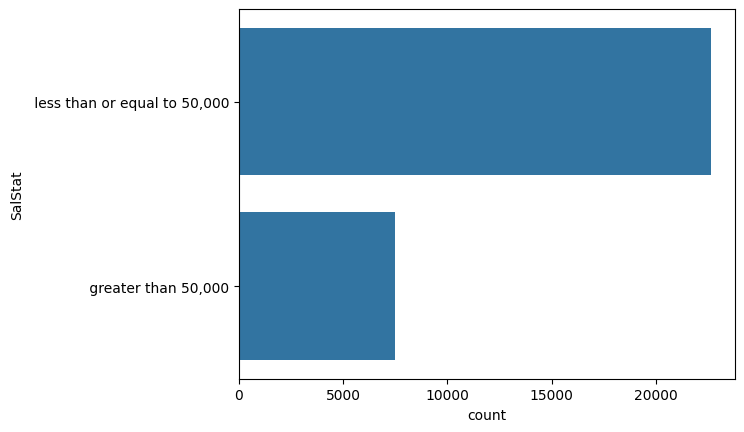

In [38]:
SalStat = sns.countplot(df2['SalStat']) # type:ignore

#### Age histogram
20-45 are high

<Axes: xlabel='age', ylabel='Count'>

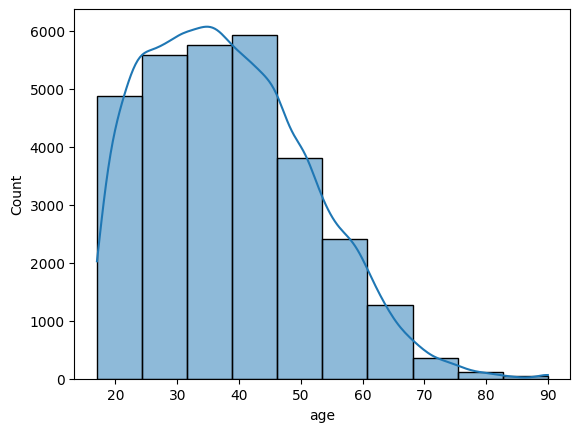

In [39]:
sns.histplot(x = df2['age'], bins = 10, kde = True)

#### box plot [box & whiskers] of age vs salary
people >50K for 35-50\
< 50K for 25-45

<Axes: xlabel='SalStat', ylabel='age'>

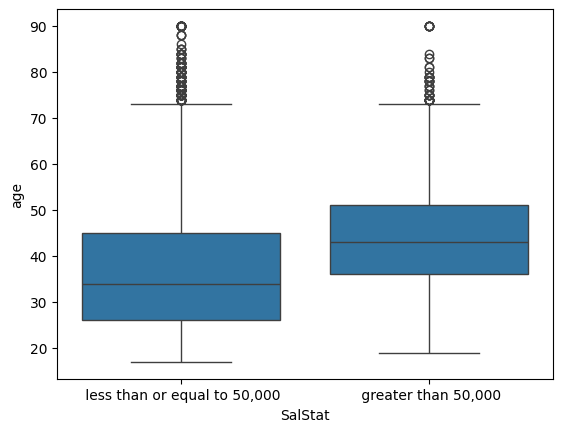

In [40]:
sns.boxplot(x = df2['SalStat'], y = df2['age'])

#### jobtype

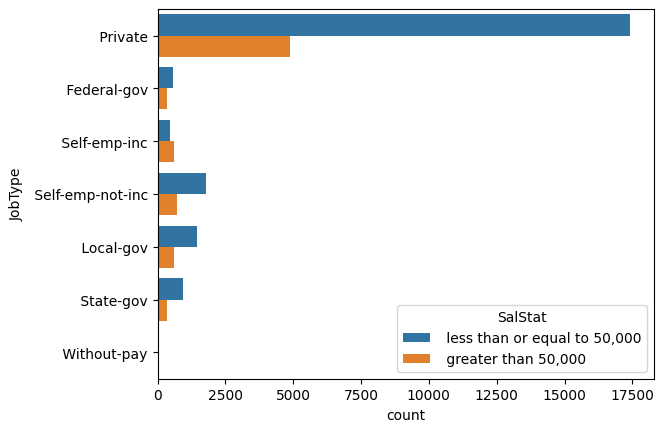

In [41]:
JobType = sns.countplot(y = df2['JobType'], hue = df2['SalStat'])

In [42]:
job_salStat = pd.crosstab(index = df2['JobType'], columns = df2['SalStat'], margins = True, normalize = 'index')
round(job_salStat*100, 1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


#### Education and EdType-SalStat

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


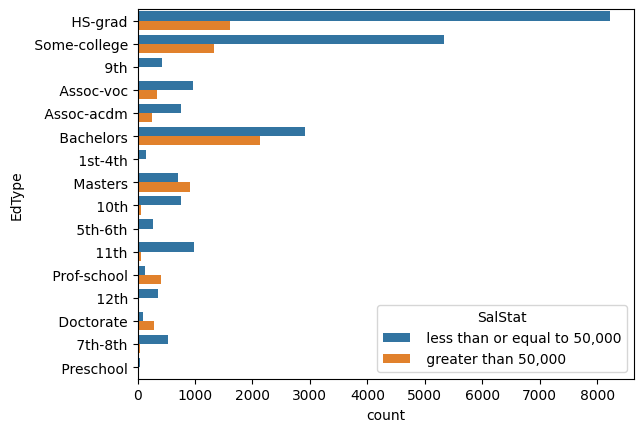

In [43]:
Education   = sns.countplot(y=df2['EdType'],hue = 'SalStat', data=df2)
EdType_salstat = pd.crosstab(index = df2["EdType"], columns = df2['SalStat'],margins = True,normalize ='index')
round(EdType_salstat*100,1)

#### Occupation and occupation_salStat

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


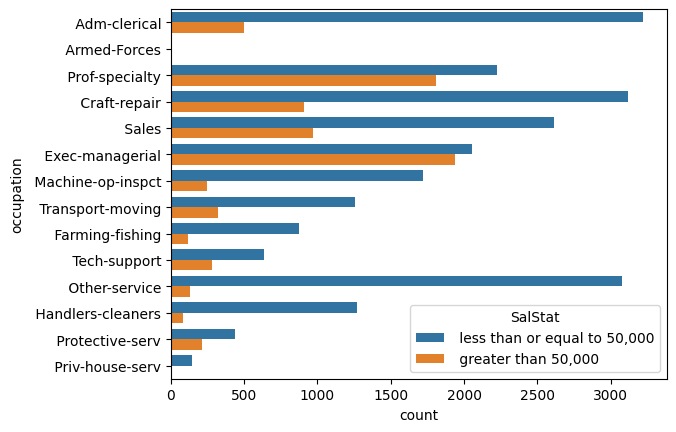

In [44]:
Occupation  = sns.countplot(y=df2['occupation'],hue = 'SalStat', data=df2)
occ_salstat = pd.crosstab(index = df2["occupation"], columns =df2['SalStat'],margins = True,normalize = 'index')
round(occ_salstat*100,1)

#### Capital Gain and Capital Loss

<Axes: xlabel='capitalgain', ylabel='Count'>

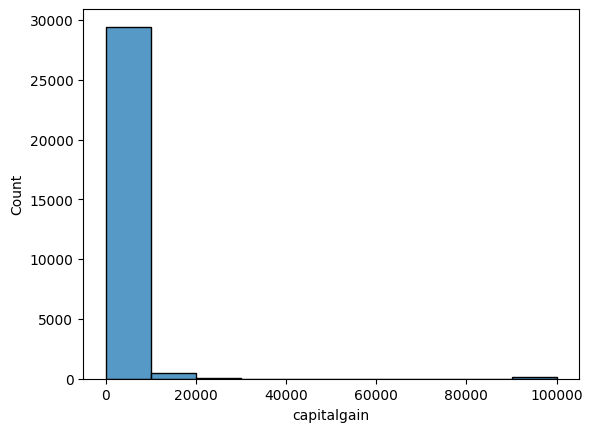

In [45]:
sns.histplot(x = df2['capitalgain'], bins = 10, kde = False)

<Axes: xlabel='capitalloss', ylabel='Count'>

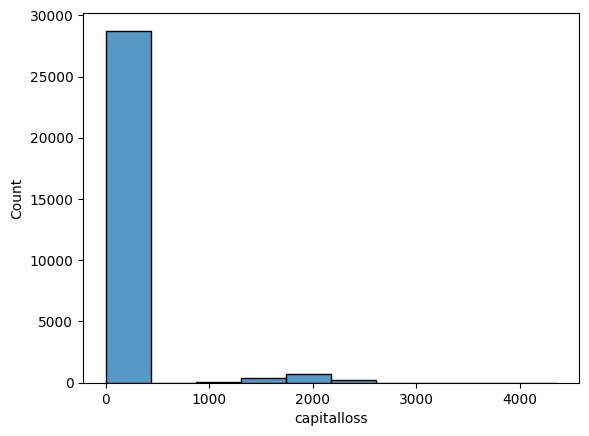

In [46]:
sns.histplot(x = df2['capitalloss'], bins = 10, kde = False)

## Logistic Regression

#### Reindexing the Salary Stat names to 0 and 1

In [47]:
df3 = df1.copy(deep=True)
df3['SalStat']=df3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(df3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [48]:
new_data=pd.get_dummies(df3, drop_first=True)
new_data
# $ One Hot Encoding. Allows us to convert categorical data into numerical data. All the categorical data is converted into numerical data with 0s and 1s as values

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Storing the column names and separating input names from data

In [49]:
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Never-worked', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 

In [50]:
features = list(set(columns_list) - set(['SalStat']))
print(features)

['JobType_ Without-pay', 'nativecountry_ Laos', 'nativecountry_ Yugoslavia', 'nativecountry_ Vietnam', 'EdType_ 9th', 'JobType_ Self-emp-not-inc', 'nativecountry_ France', 'nativecountry_ Scotland', 'EdType_ 12th', 'relationship_ Own-child', 'nativecountry_ Peru', 'nativecountry_ Portugal', 'occupation_ Handlers-cleaners', 'EdType_ Assoc-acdm', 'relationship_ Not-in-family', 'nativecountry_ Dominican-Republic', 'EdType_ Prof-school', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ India', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'relationship_ Unmarried', 'nativecountry_ Guatemala', 'nativecountry_ Germany', 'EdType_ Doctorate', 'nativecountry_ Italy', 'nativecountry_ Taiwan', 'nativecountry_ Ecuador', 'nativecountry_ Cuba', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'JobType_ Private', 'nativecountry_ Puerto-Rico', 'occupation_ Other-service', 'EdType_ Masters', 'maritalstatus_ Married-civ-spouse', 'occupation_ Priv-house-serv', 'race_ Asian-Pac-Islander', 'ge

#### Storing output values in y and new values from input features

In [51]:
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [52]:
x = new_data[features].values
print(x)

[[False False False ... False True False]
 [False False False ... False True False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False True]
 [False False False ... False False False]]


#### Splitting the dataset to train and test. Create model instance

In [53]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 2)
print(train_x)
print(train_y)
print(test_x)
print(test_y)

[[False False False ... False True False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[0 1 1 ... 1 0 0]
[[False False False ... False False False]
 [False False False ... False True False]
 [False False False ... False True True]
 ...
 [False False False ... False True False]
 [False False False ... False False False]
 [False False False ... False False False]]
[0 0 0 ... 0 0 0]


#### Fit the model

In [54]:
logistic = LogisticRegression()
logistic.fit(train_x, train_y)
logistic.coef_

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-8.84880557e-03, -5.93114553e-03,  2.64613682e-03,
        -3.06564320e-02, -2.39434507e-01, -5.62706382e-01,
         1.13976966e-02, -1.66738243e-03, -1.26228537e-01,
        -1.13506365e+00, -1.19458495e-02, -1.58496539e-02,
        -3.60195081e-01, -4.96459940e-02, -4.64888442e-01,
        -3.68675388e-02,  2.94668859e-01, -9.16175012e-02,
        -2.29507840e-02, -3.62211634e-03, -3.09550441e-01,
        -6.20646170e-01, -2.65336783e-02,  5.79044977e-03,
         2.70170043e-01, -5.57356701e-03,  2.29236027e-03,
        -1.12361281e-02, -3.63247942e-03, -6.80525697e-03,
        -1.50456778e-01, -5.50359119e-02, -7.78503077e-01,
         6.17951948e-01,  1.13543896e+00, -4.13755326e-02,
        -1.66508950e-01,  7.90029268e-02, -1.93737895e-01,
         1.01583235e+00, -2.33434439e-03,  2.33953399e-02,
        -1.32997599e-01, -4.49191728e-03,  1.52496413e-02,
         7.65198156e-01, -8.81631533e-02,  8.08663737e-01,
        -3.24540895e-01, -2.80323660e-02,  2.17143915e-0

In [55]:
logistic.intercept_

array([-1.22973961])

#### Prediction

In [56]:
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 1]


#### Confusion Matrix

In [57]:
confusion = confusion_matrix(test_y, prediction)
print(confusion)

[[6734  538]
 [1003 1319]]


#### Accuracy

In [88]:
acc = accuracy_score(test_y, prediction)
print(acc)

TypeError: 'numpy.float64' object is not callable

### Misclassified samples:

In [59]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1541


## NEW MODEL - Removing Insignificant Variables

In [60]:
df4 = df1.copy(deep=True)
df4

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [61]:
df4['SalStat'] = df4['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})
print(df4['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [62]:
cols = ['gender','nativecountry','race','JobType']
new_data = df4.drop(cols, axis = 1)

In [63]:
new_data

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
...,...,...,...,...,...,...,...,...,...
31973,34,HS-grad,Never-married,Farming-fishing,Not-in-family,594,0,60,0
31974,34,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
31975,23,Some-college,Married-civ-spouse,Adm-clerical,Husband,0,0,40,0
31976,42,Some-college,Married-civ-spouse,Adm-clerical,Wife,0,0,40,0


In [64]:
new_data = pd.get_dummies(new_data, drop_first = True)

In [65]:
cols_list = list(new_data.columns)
print(cols_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [66]:
features = list(set(cols_list) - set(['SalStat']))
print(features)

['hoursperweek', 'occupation_ Transport-moving', 'maritalstatus_ Widowed', 'occupation_ Protective-serv', 'occupation_ Farming-fishing', 'EdType_ 9th', 'occupation_ Machine-op-inspct', 'EdType_ 12th', 'relationship_ Own-child', 'occupation_ Handlers-cleaners', 'capitalgain', 'EdType_ Assoc-acdm', 'relationship_ Not-in-family', 'EdType_ Prof-school', 'EdType_ 7th-8th', 'relationship_ Other-relative', 'maritalstatus_ Married-spouse-absent', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'relationship_ Unmarried', 'EdType_ Doctorate', 'EdType_ 5th-6th', 'EdType_ Preschool', 'EdType_ 11th', 'occupation_ Other-service', 'EdType_ Masters', 'maritalstatus_ Married-civ-spouse', 'age', 'occupation_ Priv-house-serv', 'capitalloss', 'maritalstatus_ Separated', 'occupation_ Exec-managerial', 'occupation_ Tech-support', 'maritalstatus_ Married-AF-spouse', 'occupation_ Sales', 'EdType_ Bachelors', 'maritalstatus_ Never-married', 'EdType_ 1st-4th', 'relationship_ Wife', 'EdType_ HS-grad', 'o

In [77]:
y1 = new_data['SalStat'].values
print(y1)

[0 0 1 ... 0 0 0]


In [76]:
x1 = new_data[features].values
print(x1)

[[28 False False ... False False False]
 [40 False False ... False False False]
 [40 False False ... True True False]
 ...
 [40 False False ... False True False]
 [40 False False ... False True False]
 [40 False False ... True False False]]


In [82]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)
logistic = LogisticRegression()
logistic.fit(train_x1, train_y1)
logistic.coef_

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 9.66260555e-03, -1.90783554e-01, -1.19531745e-01,
         4.55670810e-02, -2.65403075e-01, -1.97697469e-01,
        -4.19985496e-01, -1.21300075e-01, -1.14316605e+00,
        -3.65636471e-01,  3.17208620e-04, -2.57139839e-02,
        -4.72151585e-01,  2.73584897e-01, -2.91146774e-01,
        -2.75242258e-01, -6.99539668e-02, -2.64346382e-03,
        -3.56745101e-01, -6.39501903e-01,  2.69205157e-01,
        -1.45717585e-01, -2.57305750e-02, -3.84996392e-01,
        -7.47783663e-01,  5.87073620e-01,  9.84181502e-01,
        -7.18636966e-03, -4.42464684e-02,  6.58266813e-04,
        -1.84052637e-01,  8.88318127e-01,  1.13954885e-01,
         1.40335939e-02,  1.36899268e-01,  6.06539830e-01,
        -1.57817664e+00, -6.93743197e-02,  7.71449771e-02,
        -1.07430319e+00,  7.48582879e-01, -4.36767583e-01,
        -9.87376002e-02]])

In [83]:
logistic.intercept_

array([-1.43974457])

In [84]:
prediction = logistic.predict(test_x1)

In [72]:
confusion = confusion_matrix(test_y, prediction)
print(confusion)

[[6823  513]
 [ 968 1290]]


In [89]:
accuracy_score = accuracy_score(test_y1, prediction)
print(accuracy_score)

TypeError: 'numpy.float64' object is not callable

In [86]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1481


# KNN MODEL

In [87]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [90]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [91]:
# Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier()

In [92]:
# Predicting the test values with model
prediction = KNN_classifier.predict(test_x)

In [93]:
# Performance metric check
confusionMmatrix = confusion_matrix(test_y, prediction)
print(confusionMmatrix)

[[6691  645]
 [ 899 1359]]


In [97]:
# Calculating the accuracy
acc = accuracy_score(test_y, prediction)
print(accuracy_score)

TypeError: 'numpy.float64' object is not callable

In [98]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

In [99]:
print(Misclassified_sample)

[1752, 1499, 1594, 1526, 1544, 1462, 1482, 1451, 1475, 1463, 1465, 1450, 1455, 1456, 1455, 1452, 1455, 1427, 1425]
